## Project 4 - Notebook
#### Team 4 - Jason, Carol, Nigel
Question 1 and 2 are Python related!

#### #1. Import libraries we may need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### #2. Review all available documentation, e.g. data dictionary, readme, etc.

Source IDCJAC0010_066062_1800_Note.txt 
  
Australian Government
Bureau of Meteorology

Notes for Daily Maximum Temperature Climate Data
  
Product code: IDCJAC0010 reference: 71786695
____________________________________________

#### #3. Read in the CSVs

In [2]:
temp_sydney_df = pd.read_csv('IDCJAC0010_066062_1800_Data.csv')

#### #4. Explore the data...  
-- look at column headers  
-- list of columns  
-- look at overall shape of data rows x columns  
-- remove useless columns  
-- look for nulls  
-- get an overview with ```describe()```

In [3]:
temp_sydney_df.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,66062,1859,1,1,24.4,NaN,Y
1,IDCJAC0010,66062,1859,1,2,24.4,1.0,Y
2,IDCJAC0010,66062,1859,1,3,24.2,1.0,Y
3,IDCJAC0010,66062,1859,1,4,24.7,1.0,Y
4,IDCJAC0010,66062,1859,1,5,24.6,1.0,Y


In [4]:
list(temp_sydney_df.columns)

['Product code',
 'Bureau of Meteorology station number',
 'Year',
 'Month',
 'Day',
 'Maximum temperature (Degree C)',
 'Days of accumulation of maximum temperature',
 'Quality']

In [5]:
temp_sydney_df.shape

(59047, 8)

In [6]:
null_df = pd.DataFrame(temp_sydney_df.isnull().sum(), columns=['Count of Nulls'])

In [7]:
null_df

,Count of Nulls
Product code,0
Bureau of Meteorology station number,0
Year,0
Month,0
Day,0
Maximum temperature (Degree C),152
Days of accumulation of maximum temperature,285
Quality,153


#### Curious about finding the nulls by year. Were there more nulls in a particular year? null_df['Year']

In [8]:
#null_df.groupby(by=['Year'])

In [9]:
temp_sydney_df['Maximum temperature (Degree C)'].value_counts(dropna=False)
#This doesn't show that there are nulls

22.8    655
23.3    652
22.2    640
20.6    638
23.9    636
       ... 
41.0      1
41.8      1
42.2      1
42.1      1
42.5      1
Name: Maximum temperature (Degree C), Length: 335, dtype: int64

In [10]:
temp_sydney_df.describe()

,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature
count,59047.0,59047.000000,59047.000000,59047.000000,58895.000000,58762.000000
mean,66062.0,1939.333328,6.514709,15.729216,21.744892,1.000017
std,0.0,46.669369,3.447166,8.799955,4.671444,0.004125
min,66062.0,1859.000000,1.000000,1.000000,7.700000,1.000000
25%,66062.0,1899.000000,4.000000,8.000000,18.200000,1.000000
50%,66062.0,1939.000000,7.000000,16.000000,21.600000,1.000000
75%,66062.0,1980.000000,10.000000,23.000000,24.900000,1.000000
max,66062.0,2020.000000,12.000000,31.000000,45.800000,2.000000


#### #5. Review the questions...

What has been the average temperature recorded in Sydney since records
began?  
We can get the answer to this from the exploration above but also from using series.mean()

In [11]:
round(temp_sydney_df['Maximum temperature (Degree C)'].mean(), 2)

21.74

January in Sydney is hotter than July in Sydney, because January is summer ☀️ and
July is winter 🌧.  
What has been the average temperature recorded in Sydney in each month?  
(i.e. What has the average been over all January days, all February days, ... etc.)

In [12]:
new_df = pd.DataFrame(temp_sydney_df.groupby(by=['Month'])['Maximum temperature (Degree C)'].mean()).reset_index()
#new_df['Avg Daily Temp']=round(temp_sydney_df['Maximum temperature (Degree C)'].mean(), 2)

In [13]:
new_df

,Month,Maximum temperature (Degree C)
0,1,26.013052
1,2,25.840514
2,3,24.812717
3,4,22.516035
4,5,19.532583
5,6,17.010163
6,7,16.422014
7,8,17.892974
8,9,20.085380
9,10,22.175921


In [4]:
avg_monthly_temp = temp_sydney_df.groupby(by=['Year','Month'])['Maximum temperature (Degree C)'].agg(['mean']).reset_index()
avg_monthly_temp

NameError: name 'temp_sydney_df' is not defined

In [15]:
temp_sydney_df['avg monthly temp'] = avg_monthly_temp['mean']

In [16]:
temp_sydney_df.tail()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality,avg monthly temp
59042,IDCJAC0010,66062,2020,8,26,19.6,1.0,Y,NaN
59043,IDCJAC0010,66062,2020,8,27,22.2,1.0,Y,NaN
59044,IDCJAC0010,66062,2020,8,28,19.7,1.0,Y,NaN
59045,IDCJAC0010,66062,2020,8,29,21.5,1.0,Y,NaN
59046,IDCJAC0010,66062,2020,8,30,25.3,1.0,Y,NaN


Plotting the month vs the temperature recorded

In [17]:
#avg_monthly_temp.plot(x = 'Month', y = 'Mean', kind = 'scatter')

<AxesSubplot:xlabel='Month'>

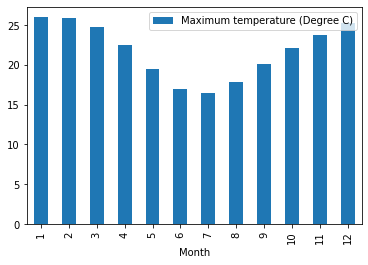

In [18]:
new_df.plot(kind = 'bar', x = 'Month', y ='Maximum temperature (Degree C)')

<AxesSubplot:xlabel='Month', ylabel='Maximum temperature (Degree C)'>

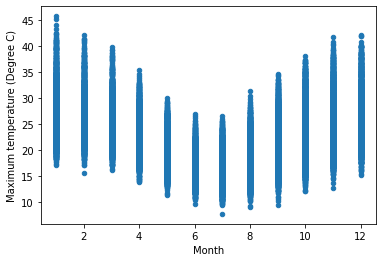

In [19]:
temp_sydney_df.plot.scatter('Month','Maximum temperature (Degree C)')

Create a table of how much hotter each month is than the average.  
i.e. How much hotter is January than the average day?  
How much hotter is February than the average day?

In [20]:
#temp_sydney_df.groupby(by=['Year','Month'])['Maximum temperature (Degree C)'].agg(['mean'])
avg_yearly_temp = temp_sydney_df.groupby(by=['Year'])['Maximum temperature (Degree C)'].mean().round(2).reset_index()
avg_yearly_temp['Mean_monthly_temp'] = 

,Year,Maximum temperature (Degree C)
0,1859,21.40
1,1860,20.28
2,1861,20.86
3,1862,21.35
4,1863,20.96
...,...,...
157,2016,23.84
158,2017,23.68
159,2018,23.36
160,2019,24.01


In [21]:
prod["Newlistprice"] = prod["ListPrice"].apply(lambda x: x + 100)
temp_sydney_df["avg_monthly_temp_minus_avg_yearly_temp"] = /
temp_sydney_df['Maximum temperature (Degree C)'].apply(lambda x:x - )

SyntaxError: invalid syntax (<ipython-input-21-35ced35a7a2f>, line 2)

James recommendation for backfill...  
Method to use for filling holes in reindexed Series pad / ffill: propagate last valid observation forward to next valid backfill / bfill: use next valid observation to fill gap.